In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import sys

sys.path.append("..")

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union
from util.spike_trains import get_GWN

<IPython.core.display.Javascript object>

In [232]:
class LIF:
    def __init__(self, dt: float):

        self.dt = dt

        self.resting_potential = -75.0
        self.threshold = -55.0
        self.reset = -85.0
        self.tau_m = 10.0  # membrane time constant -> given by TODO
        self.tau_rsa = 0.1
        self.g_delta = -10.0
        self.resistance = 10.0
        self.leak_reversal_potential = -75.0

        self.spikes = []
        self.voltages = [self.resting_potential]
        self.spike_rate_adaptions = [-1]

    def step(self, input_current: Union[float, int]):
        dx = (self.dt / self.tau_m) * (
            self.leak_reversal_potential
            - self.voltages[-1]
            - (
                self.tau_m
                * self.spike_rate_adaptions[-1]
                * (self.voltages[-1] - self.reset)
            )
            + (input_current / self.resistance)
        )

        new_x = self.voltages[-1] + dx

        if new_x >= self.threshold:
            # increase adaption by g_delta
            new_g_sra = self.spike_rate_adaptions[-1] + self.g_delta

            self.spikes = self.spikes + [len(self.voltages)]
            new_x = self.reset
        else:
            # relax adaption
            new_g_sra = -self.spike_rate_adaptions[-1] * (self.dt / self.tau_rsa)

        self.spike_rate_adaptions += [new_g_sra]
        self.voltages += [new_x]

<IPython.core.display.Javascript object>

In [233]:
mu_gwn = 250
sig_gwn1 = 0.5
dt = 0.01
size = 1000

<IPython.core.display.Javascript object>

In [234]:
gwn = get_GWN(dt, size, mu_gwn, sig_gwn1, 1000)

<IPython.core.display.Javascript object>

no of spikes: 16


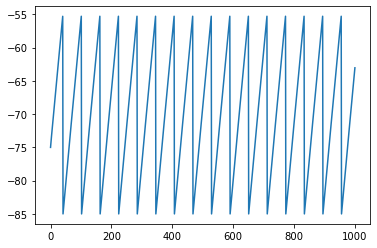

<IPython.core.display.Javascript object>

In [235]:
inputs = np.ones(size) * 5000

lif = LIF(dt=dt)

for inp in inputs:
    lif.step(inp)

plt.plot(lif.voltages)
print(f"no of spikes: {len(lif.spikes)}")

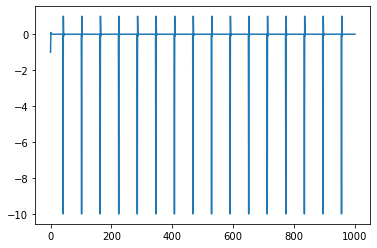

<IPython.core.display.Javascript object>

In [236]:
plt.plot(lif.spike_rate_adaptions)
plt.show()

In [177]:
lif.spike_rate_adaptions

[1,
 -0.0001,
 1e-08,
 -1e-12,
 1e-16,
 -1.0000000000000001e-20,
 1.0000000000000001e-24,
 -1.0000000000000002e-28,
 1.0000000000000002e-32,
 -1.0000000000000003e-36,
 1.0000000000000003e-40,
 -1.0000000000000003e-44,
 1.0000000000000004e-48,
 -1.0000000000000006e-52,
 1.0000000000000006e-56,
 -1.0000000000000007e-60,
 1.0000000000000006e-64,
 -1.0000000000000007e-68,
 1.0000000000000007e-72,
 -1.0000000000000007e-76,
 1.0000000000000007e-80,
 -1.0000000000000007e-84,
 1.0000000000000008e-88,
 -1.0000000000000008e-92,
 1.000000000000001e-96,
 -1.000000000000001e-100,
 1.000000000000001e-104,
 -1.000000000000001e-108,
 1.000000000000001e-112,
 -1.000000000000001e-116,
 1.000000000000001e-120,
 -1.000000000000001e-124,
 1.0000000000000011e-128,
 -1.0000000000000011e-132,
 1.0000000000000011e-136,
 -1.0000000000000011e-140,
 1.0000000000000012e-144,
 -1.0000000000000013e-148,
 1.0000000000000013e-152,
 -1.0000000000000013e-156,
 1.0000000000000014e-160,
 -1.0000000000000015e-164,
 1.00000

<IPython.core.display.Javascript object>

In [19]:
lif.spikes

[154, 350, 539, 729, 923]

<IPython.core.display.Javascript object>

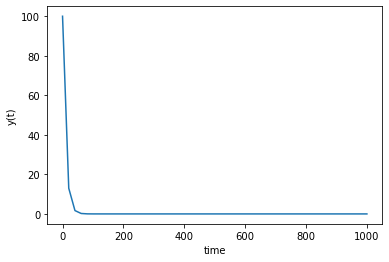

<IPython.core.display.Javascript object>

In [166]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(g, t):
    dgdt = -g / 10
    return dgdt


# initial condition
y0 = 100

# time points
t = np.linspace(0, 1000)

# solve ODE
y = odeint(model, y0, t)

# plot results
plt.plot(t, y)
plt.xlabel("time")
plt.ylabel("y(t)")
plt.show()